# 05. Unsupervised machine learning - Clustering
## Notebook content:
    1. Importing libraries and data
    2. Preprocessing
    3. The elbow technique
    4. k-means clustering

### 1. Importing libraries and data

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans #import the k-means algorithm from scikit-learn.
import pylab as pl #convenience module that bulk imports matplotlib.
sns.set()
from sklearn.preprocessing import StandardScaler #module used to standardise data
from sklearn.decomposition import PCA

In [2]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\bruna\Data Analysis Projects\2023-12 Superstore Sales Analysis'

In [112]:
# Import the sales data
sales_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_under1000.pkl'))

In [113]:
sales_clean.shape

(8076, 19)

In [114]:
sales_clean.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656


### 2. Data pre processing

For this analysis we will need to remove categorical variables.
For that, I'll create a new df with the following columns: Sales, Quantity, Discount, Profit. 

I will also need to standardise the data scales. I will do that with PCA.


#### 2.1. Removing categorical variables

In [115]:
sales_clean_numerical = sales_clean.filter(['Sales','Quantity','Discount','Profit'], axis=1)

In [116]:
sales_clean_numerical

,Sales,Quantity,Discount,Profit
0,261.960,2,0.0,41.9136
2,14.620,2,0.0,6.8714
4,22.368,2,0.2,2.5164
5,48.860,7,0.0,14.1694
6,7.280,4,0.0,1.9656
...,...,...,...,...
9988,206.100,5,0.0,55.6470
9989,25.248,3,0.2,4.1028
9990,91.960,2,0.0,15.6332
9991,258.576,2,0.2,19.3932


#### 2.2 Scale data

In [117]:
# Data standardisation

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(sales_clean_numerical)

In [118]:
# Fit standardised data using PCA

pca = PCA()
pca.fit(segmentation_std)

PCA()

In [119]:
# Decide how many features to keep based on the cumulative variance plot

pca.explained_variance_ratio_ #the attribute shows how much variance is 
#explained by each of the 4 individual components

array([0.41404855, 0.26534231, 0.2089857 , 0.11162343])

Text(0, 0.5, 'Cumulative Explained Variance')

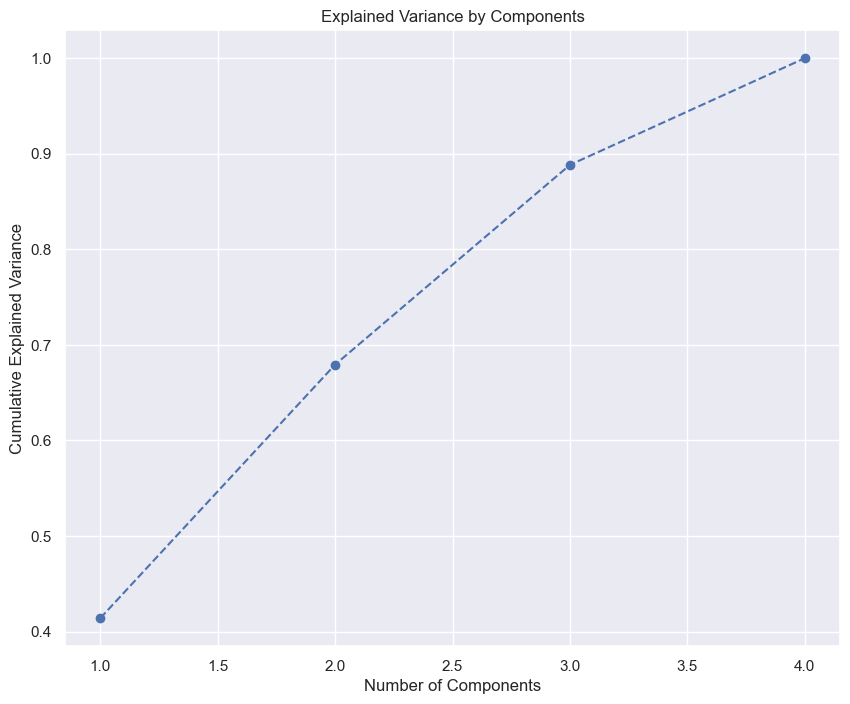

In [120]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#### 2.3. Perform PCA with chosen number of components

In [121]:
# Keep 3 components

pca = PCA(n_components = 4)

In [122]:
# Fit the model with the 3 chosen components

pca.fit(segmentation_std)

PCA(n_components=4)

In [123]:
# Select only the calculated resulting components scores for the elements in our dataset

pca.transform(segmentation_std)

array([[ 1.90117892, -0.64344923,  1.23618857, -0.35899411],
       [-0.29442076, -1.14710119, -0.10154707,  0.26710077],
       [-0.90704802, -0.46181782,  0.23608497, -0.08010961],
       ...,
       [ 0.31255274, -0.97485946,  0.31437592,  0.15808711],
       [ 0.58858198,  0.13066175,  1.4957096 , -0.02250114],
       [ 0.28137577, -0.5019541 , -0.66445095,  0.19332853]])

In [124]:
scores_pca = pca.transform(segmentation_std)

### 3. The elbow technique

In [125]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [126]:
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-32304.00000000003,
 -23980.33512565306,
 -17738.756286780223,
 -13789.451301179079,
 -11316.49726906684,
 -9943.394061207511,
 -8994.383795770182,
 -8172.378875541029,
 -7512.413245006345]

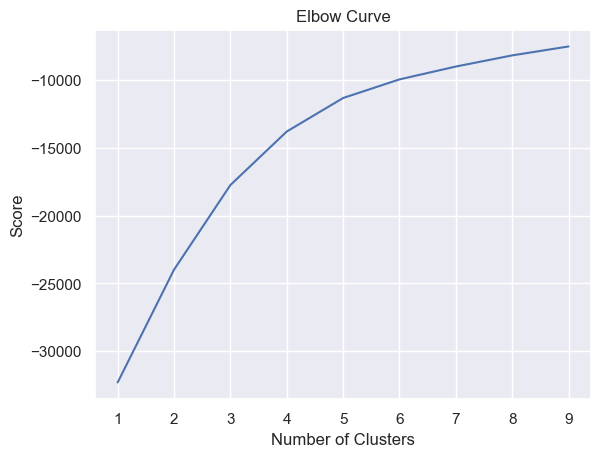

In [127]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  The curve seems to flatten after 5. I'll try a count of clusters of five.

### 3. k-means clustering

In [145]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6) 


In [146]:
# Fit the k-means object to the data.

kmeans.fit(scores_pca)

C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [147]:
# Assuming scores_pca is a NumPy array
scores_pca_df = pd.DataFrame(scores_pca, columns=['Sales','Quantity','Discount','Profit'])  # Replace 'feature1', 'feature2', ... with your actual feature names

# Reset the index and add the 'clusters' column
scores_pca_df['clusters'] = kmeans.fit_predict(scores_pca_df)

C:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [148]:
scores_pca_df.head()

,Sales,Quantity,Discount,Profit,clusters
0,1.901179,-0.643449,1.236189,-0.358994,1
1,-0.294421,-1.147101,-0.101547,0.267101,5
2,-0.907048,-0.461818,0.236085,-0.080110,0
3,0.813296,0.515479,-1.535200,0.421506,4
4,-0.213637,-0.492341,-0.794010,0.573561,5


In [149]:
scores_pca_df['clusters'].value_counts()

clusters
5    2307
0    2239
4    1468
1    1001
2     661
3     400
Name: count, dtype: int64

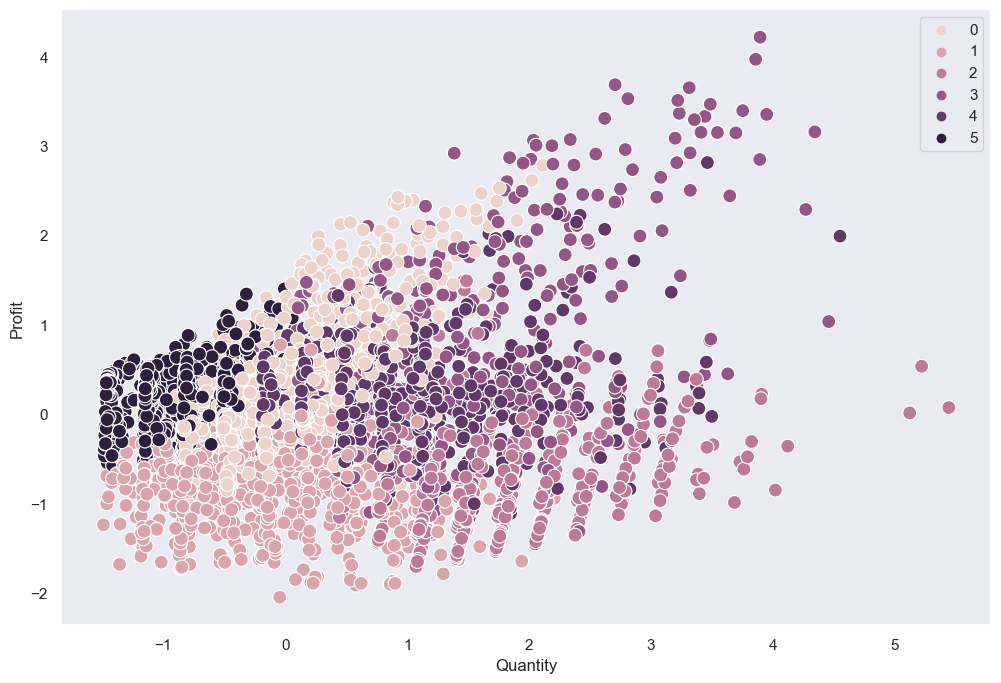

In [150]:
# Plot the clusters for the "Quantity" and "Profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scores_pca_df['Quantity'], y=scores_pca_df['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Quantity') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.show()

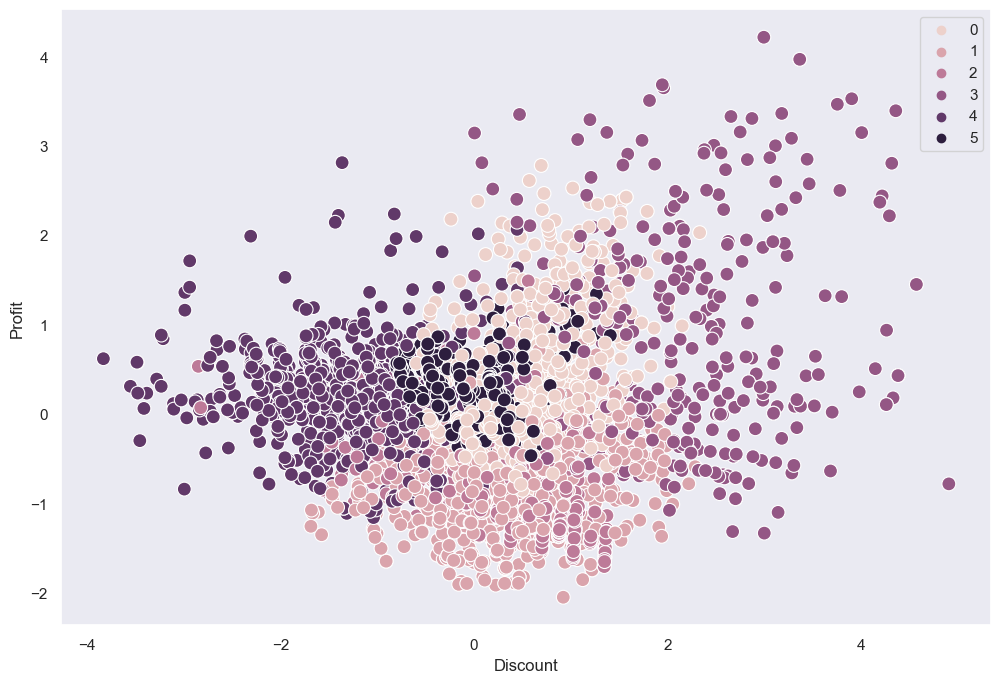

In [151]:
# Plot the clusters for the "Discount" and "Profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scores_pca_df['Discount'], y=scores_pca_df['Profit'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Discount') 
plt.ylabel('Profit') 
plt.show()

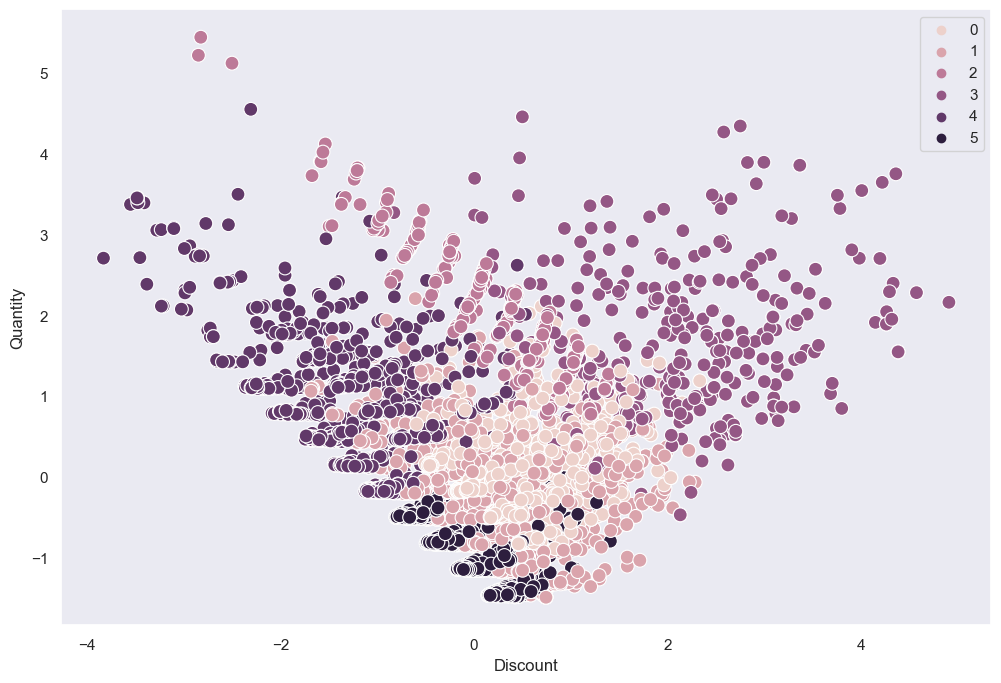

In [152]:
# Plot the clusters for the "Discount" and "Quantity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scores_pca_df['Discount'], y=scores_pca_df['Quantity'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Discount') 
plt.ylabel('Quantity') 
plt.show()

In [154]:
scores_pca_df.loc[scores_pca_df['clusters'] == 5, 'cluster'] = 'darkest'
scores_pca_df.loc[scores_pca_df['clusters'] == 4, 'cluster'] = 'dark'
scores_pca_df.loc[scores_pca_df['clusters'] == 3, 'cluster'] = 'dark-medium'
scores_pca_df.loc[scores_pca_df['clusters'] == 2, 'cluster'] = 'medium'
scores_pca_df.loc[scores_pca_df['clusters'] == 1, 'cluster'] = 'light'
scores_pca_df.loc[scores_pca_df['clusters'] == 0, 'cluster'] = 'lightest'

In [155]:
stat_analysis = scores_pca_df.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Quantity':['mean', 'median'], 
                         'Discount':['mean', 'median'],
                          'Profit':['mean', 'median']})

# Round the values to 2 decimal places
stat_analysis = stat_analysis.round(2)

stat_analysis

Sales        Quantity        Discount        Profit       
             mean median     mean median     mean median   mean median
cluster                                                               
dark         0.56   0.49     0.68   0.50    -1.20  -1.08   0.18   0.16
dark-medium  2.26   2.20     1.62   1.53     2.08   2.08   0.88   0.68
darkest     -0.08  -0.14    -0.96  -1.03    -0.14  -0.13   0.27   0.30
light        1.70   1.61    -0.21  -0.21     0.34   0.33  -0.77  -0.80
lightest    -0.73  -0.77    -0.17  -0.18     0.28   0.20   0.05  -0.10
medium      -2.42  -2.40     1.75   1.54     0.42   0.57  -0.87  -0.97

    Judging by these statistics, you can state a few facts:

     - The dark purple cluster has the best stats in almost all categories. The median number of shops around this type of property is five, which is significantly larger than the other two. It also has the shortest distance to metro stations.
     
    - The age of the property doesn’t seem to matter much. The best-rated cluster (dark purple) has a higher median age than the second best (pink) but not the third (purple).
    
    - Judging by the median value of “D. metro” in the dark purple cluster—which is only around 374 meters—you could assume that there are quite a few metro stations around these properties. You could then assume that this is a densely populated area with many buildings, offices, and shops.
    
    - Conversely, you can see that in areas where there aren’t many shops, there also aren’t any metro stations nearby. This makes sense because people living further away from city centers would likely have cars.

    
    This cluster analysis highlighted the fact that your data could be divided into categories such as “Properties in densely populated city areas” (assuming that a higher number of residents predisposes more shops), “Properties in newly built non-central areas” (assuming that new houses are mainly built outside of city centers), and “Distant commuter properties” (assuming that those more distant from metro stations commute themselves). You could take things one step further from here by using a classification algorithm to predict prices. This is a great example of combining unsupervised machine learning with supervised machine learning: you start with the former to create labels in the data, then use the latter to predict those labels.